# Asignment Setup, Visualization, Trend and Pattern Summary


## Airtable Setup and Automation Process

This section outlines the systematic approach taken to manage data efficiently, starting from CSV file cleanup to Airtable configuration and automation:

1. **CSV File Cleanup and Preprocessing**:

   - **Automated Data Extraction**: Recognizing the potential for future datasets to follow a similar format, a Python script was developed to automatically extract and clean data from the CSV file. This ensures consistency and accuracy in data handling, preparing it for seamless integration into Airtable.

2. **Airtable Configuration**:

   - **Primary Base**: A comprehensive Airtable base was created to manage and track key metrics. This base serves as the central repository for all data related to lead generation, Kajabi metrics, and social media engagement. [View Airtable Base here](https://airtable.com/invite/l?inviteId=invfxeDi5sf212b1n&inviteToken=4e5845b723ea01882970b0ffb2454b4ecfbcc2bea35111d7d44b2bfbc7775005&utm_medium=email&utm_source=product_team&utm_content=transactional-alerts)

   - **Alternative "Tall" Arrangement Base**: An additional base was designed using a tall data structure, inspired by traditional database design. This format is more scalable for adding new metrics, though it may not be necessary for our current use case. [View Tall Arrangement Base here](https://airtable.com/invite/l?inviteId=invNr9hOSPGYDdMFT&inviteToken=d62b6ef424b80ec925822d8618449767a246ee74bc51c1113fbf8f65c32a1693&utm_medium=email&utm_source=product_team&utm_content=transactional-alerts)

3. **Automation**:

   - **Email Notifications**: Automated email notifications were set up to remind the team to update data at the start of each month, ensuring timely and accurate data entry.

   - **Data Update Alerts**: A workflow was established to send notifications whenever data is updated, keeping the team informed of any changes in real-time.

4. **Python Scripting:**
  
   - **API Interaction**: Python scripts were developed to interact with the Airtable API, enabling the creation of new records or updating existing ones directly from the cleaned CSV data.

   - **Data Validation**: As Airtable doesn’t enforce strict primary key validation (e.g., for "Month-Year"), I included checks in my Python script to prevent accidental overwriting of data. 

   - **Visualization**: The transformed data was visualized using popular Python libraries such as Matplotlib and Seaborn. These libraries were used to create charts, graphs, and tables that provide clear and insightful visual representations of the data.


These processes collectively enhance the efficiency and reliability of data management within Airtable, providing a robust framework for ongoing analysis and decision-making.

## Social Metrics Insta Analysis

**Plotting with Python**

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
# Read data from CSV
file_path = '../transformed_wide/social_metrics.csv'
df = pd.read_csv(file_path)

In [82]:
df.head()

,Month,Year,Number of Followers,Net Follower Growth,Total Engagement,Total Impressions,Total Video Views,Number of Followers Previous Month,Date
0,Sept,2024,9690,NaN,4315,343802,1800,NaN,2024-09-28
1,Oct,2024,10251,561.0,1841,61132,5645,9690.0,2024-10-28


In [83]:
# Ensure the data types are correct (if needed)
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime

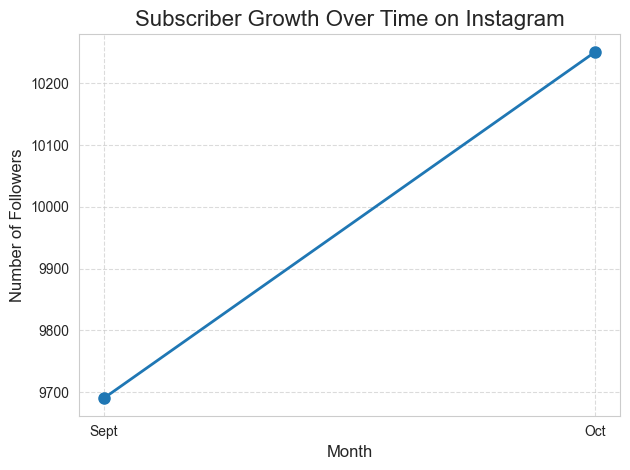

In [84]:
 # Line plot for Number of Followers
plt.plot(df['Month'], df['Number of Followers'], 
         marker='o', linestyle='-', linewidth=2, markersize=8)

plt.title('Subscriber Growth Over Time on Instagram', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Followers', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('subscriber_growth.png')
plt.show()




**Total Engagement and Impressions:**
   - **Observation**: While the number of followers is generally increasing, total engagement is on a downward trend. With only two months of data, it's challenging to predict future trends.

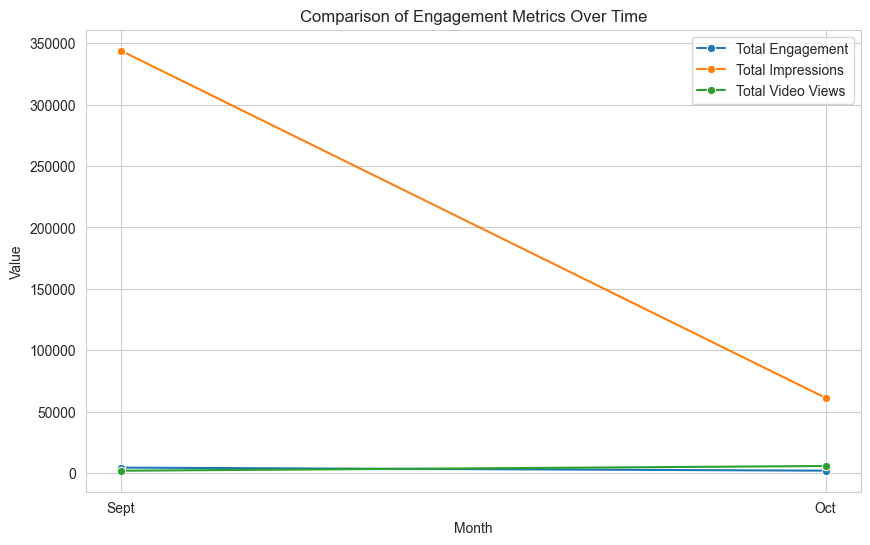

In [85]:
metrics = ['Total Engagement', 'Total Impressions', 'Total Video Views']

plt.figure(figsize=(10, 6))
for metric in metrics:
    sns.lineplot(data=df, x='Month', y=metric, marker='o', label=metric)

plt.title('Comparison of Engagement Metrics Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('engagement_metrics.png')
plt.show()

**Total Engagement and Impressions:**
The total Impression was quite high in September, as a result we can't properly see the other metrics. We will exclude it so that the other metrics can be properly seen.

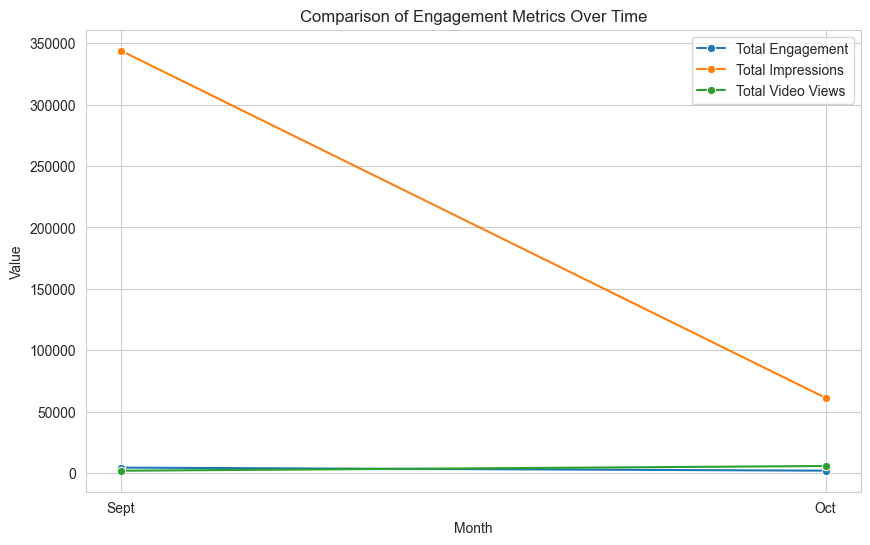

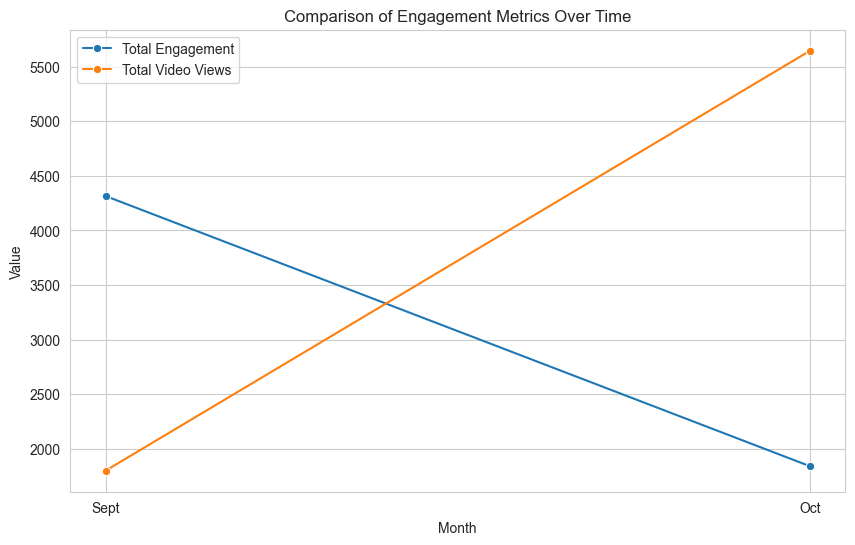

In [86]:
metrics = ['Total Engagement', 'Total Video Views']

plt.figure(figsize=(10, 6))
for metric in metrics:
    sns.lineplot(data=df, x='Month', y=metric, marker='o', label=metric)

plt.title('Comparison of Engagement Metrics Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('engagement_metrics_without_impression.png')
plt.show()


   - **Observation**: There was a noticeable increase in video views, potentially driven by a significant spike in `total impressions` during September.

   - Despite the increase in video views, total engagement has declined from approximately 4,300 to 1,800. This decline coincides with a sharp drop in total impressions.


   - **Insight**: The correlation between high impressions and increased video views suggests that boosting visibility can effectively drive video engagement. 

   - The decline in engagement may be linked to reduced visibility. Investigate factors contributing to the drop in impressions and explore ways to enhance content reach and engagement strategies.

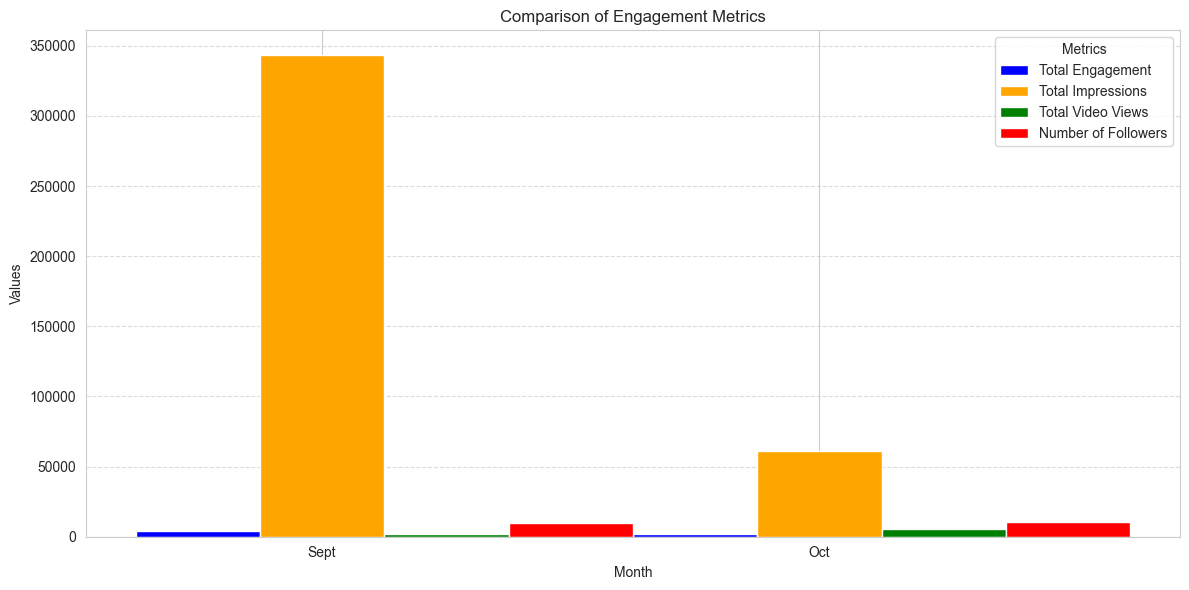

In [87]:
# Set up engagement metrics and month for the bar chart
metrics = ['Total Engagement', 'Total Impressions', 'Total Video Views', 'Number of Followers']

color_palette = {
    'Total Engagement': 'blue',
    'Total Impressions': 'orange',
    'Total Video Views': 'green',
    'Number of Followers': 'red'
}

x = np.arange(len(df['Month']))  # X-axis positions
bar_width = 0.25  # Width of each bar

# Plot each metric as a separate bar
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(
        x + i * bar_width, 
        df[metric], 
        width=bar_width, 
        label=metric,
        color=color_palette[metric]
    )
    
    # Set up the x-axis and labels
plt.xticks(x + bar_width, df['Month'])
plt.title('Comparison of Engagement Metrics')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('engagement_metrics_bar.png')
plt.show()


Once again we the high total impression in September is affecting the other metrics. We will exclude it so that the other metrics can be properly seen.

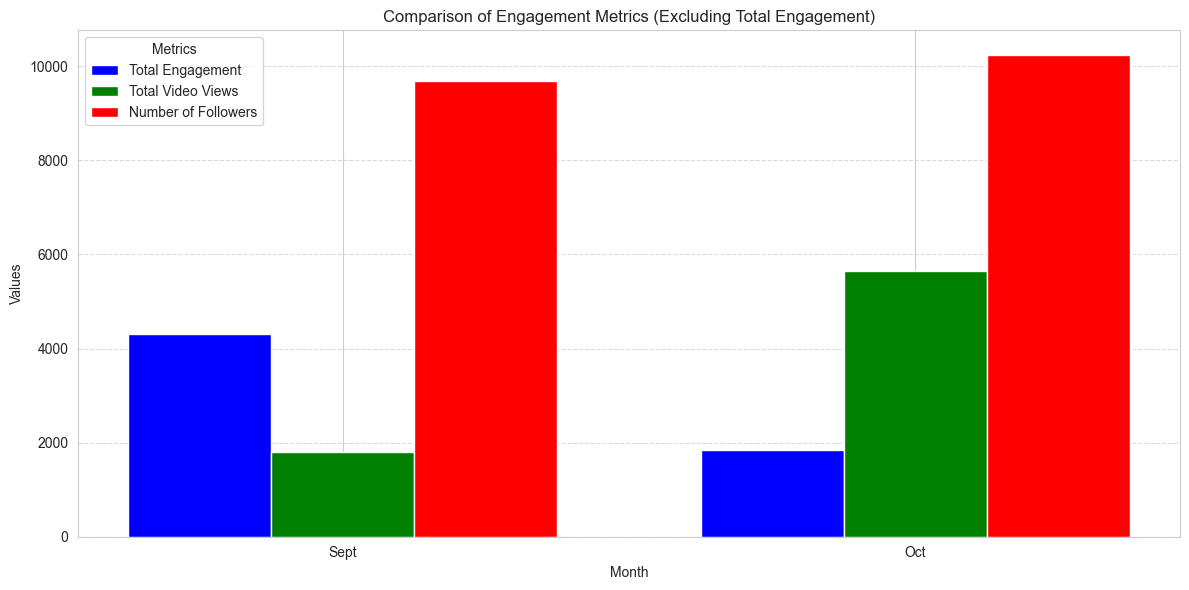

In [88]:
# Define the metrics to include, excluding 'Total Impression'
metrics = ['Total Engagement', 'Total Video Views', 'Number of Followers']
x = np.arange(len(df['Month']))  # X-axis positions
bar_width = 0.25  # Width of each bar

# Plot each metric as a separate bar
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(
        x + i * bar_width, 
        df[metric], 
        width=bar_width, 
        label=metric,
        color=color_palette[metric]
    )

# Set up the x-axis and labels
plt.xticks(x + bar_width, df['Month'])
plt.title('Comparison of Engagement Metrics (Excluding Total Engagement)')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('engagement_metrics_bar_without_impression.png')
plt.show()

The increase in total video views and number of followers indicates growing audience engagement. However, the decline in total engagement may be attributed to the high total impressions in September, possibly due to a one-time event. It's important to leverage the rise in video views and followers while addressing the engagement drop.

## Kajabi Analysis

In [89]:
df = pd.read_csv('../transformed_wide/kajabi_metrics.csv')
df[['Month', 'Year', 'New Subscribes', 'Unsubscribes', 'Net Subscriber Growth', 'Total Subscribers']]


,Month,Year,New Subscribes,Unsubscribes,Net Subscriber Growth,Total Subscribers
0,Sept,2024,3310,372,2938,6547
1,Oct,2024,1017,2,1015,7147


This is the data for the Kajabi platform.

In [90]:
# Set up metrics and month for the bar chart
metrics = ['New Subscribes', 'Unsubscribes', 'Total Subscribers']
x = np.arange(len(df['Month']))  # X-axis positions
bar_width = 0.25  # Width of each bar


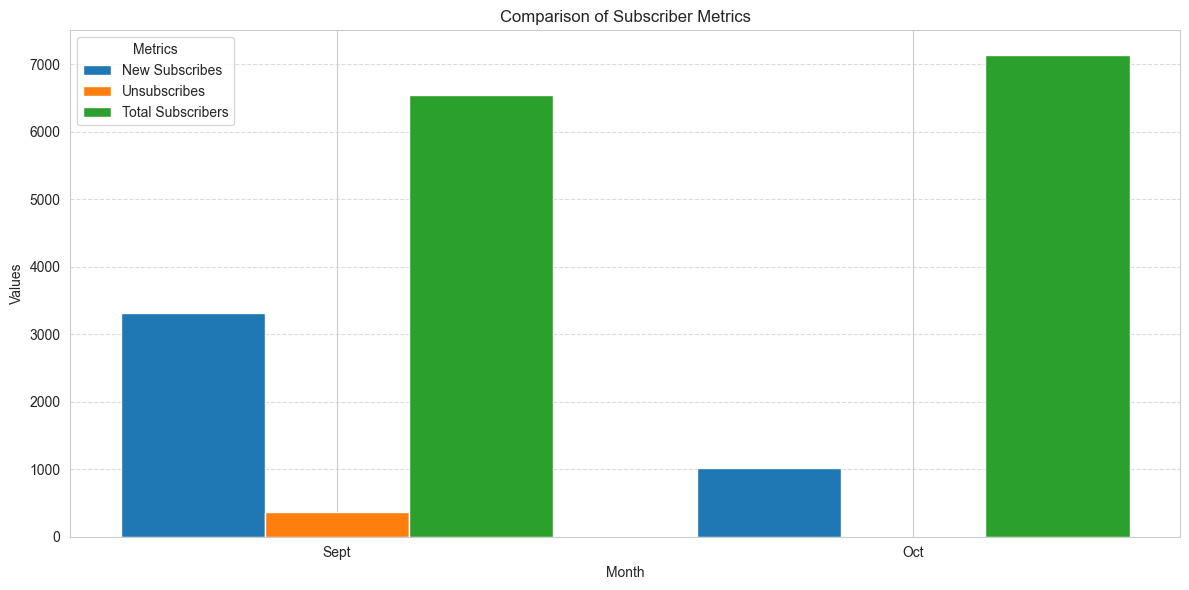

In [91]:
# Plot each metric as a separate bar
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(
        x + i * bar_width, 
        df[metric], 
        width=bar_width, 
        label=metric
    )

# Set up the x-axis and labels
plt.xticks(x + bar_width, df['Month'])
plt.title('Comparison of Subscriber Metrics')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('subscriber_metrics_bar.png')

plt.show()

### Kajabi Growth Analysis

- **Subscriber Trends**
  - **September**: The platform experienced a significant influx of new subscribers, with a total of 3,310 new sign-ups. However, this was offset by a relatively high number of unsubscribes (372), resulting in a net subscriber growth of 2,938.

  - **October**: The number of new subscribers decreased to 1,017, but the number of unsubscribes dropped dramatically to just 2. This led to a net subscriber growth of 1,015, indicating a more stable subscriber base.

- **Insight**
  - **Retention Improvement**: The drastic reduction in unsubscribes from September to October suggests improved retention strategies or increased customer satisfaction.

  - **Sustained Growth**: Despite the decrease in new sign-ups in October, the low unsubscribe rate contributed to a healthy net growth, highlighting the importance of retaining existing subscribers.

## Lead Gen Analysis
Let's look at the several metrics for the lead gen dataset and compare the metrics across the two months.

In [92]:
df = pd.read_csv('../transformed_wide/lead_gen_metrics.csv')
df[['Month', 'Year', 'Linktree', 'Many Chat', 'Podcast', 'Direct from Website', 'Social ads', 'Affiliates']]


,Month,Year,Linktree,Many Chat,Podcast,Direct from Website,Social ads,Affiliates
0,Sept,2024,60,136,0,5,3497,0
1,Oct,2024,3,45,6,87,48,0


In [93]:
df

,Month,Year,Affiliates,Direct from Website,Linktree,Many Chat,Podcast,Social ads,Total Leads,Cumulative Leads,Date
0,Sept,2024,0,5,60,136,0,3497,3698,3698,2024-09-28
1,Oct,2024,0,87,3,45,6,48,189,3887,2024-10-28


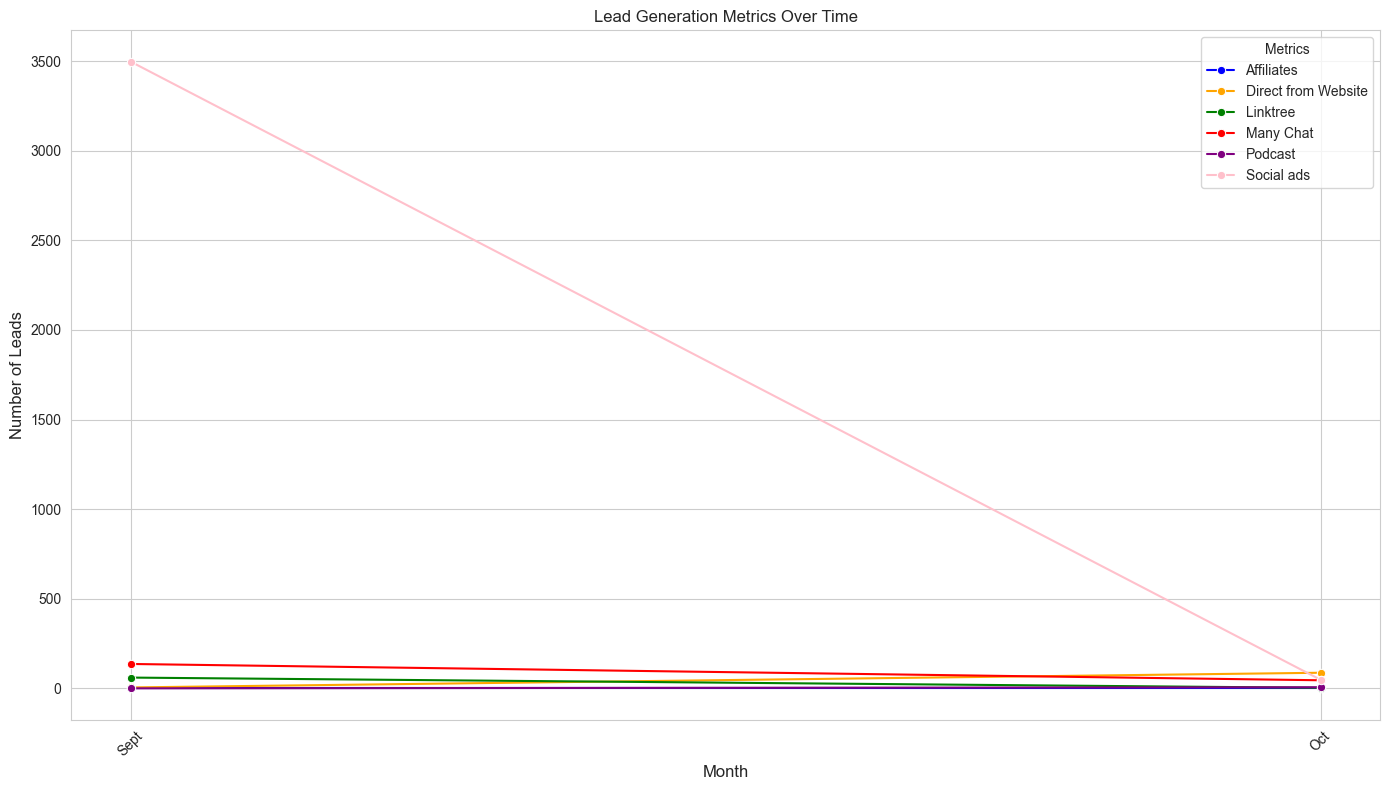

In [94]:
 #Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the style of seaborn
sns.set_style("whitegrid")

# Define the metrics to plot
metrics = ['Affiliates', 'Direct from Website', 'Linktree', 'Many Chat', 'Podcast', 'Social ads']

color_palette = {
    'Affiliates': 'blue',
    'Direct from Website': 'orange',
    'Linktree': 'green',
    'Many Chat': 'red',
    'Podcast': 'purple',
    'Social ads': 'pink'
}

# Create a figure and axis
plt.figure(figsize=(14, 8))

# Plot each metric
for metric in metrics:
    sns.lineplot(data=df, x='Month', y=metric, marker='o', label=metric, color=color_palette[metric])

# Add titles and labels
plt.title('Lead Generation Metrics Over Time')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('lead_gen_metrics.png')
plt.show()

The social ads channel is the highest contributor to the lead gen metrics. To see the other channels, we will exclude the social ads channel.

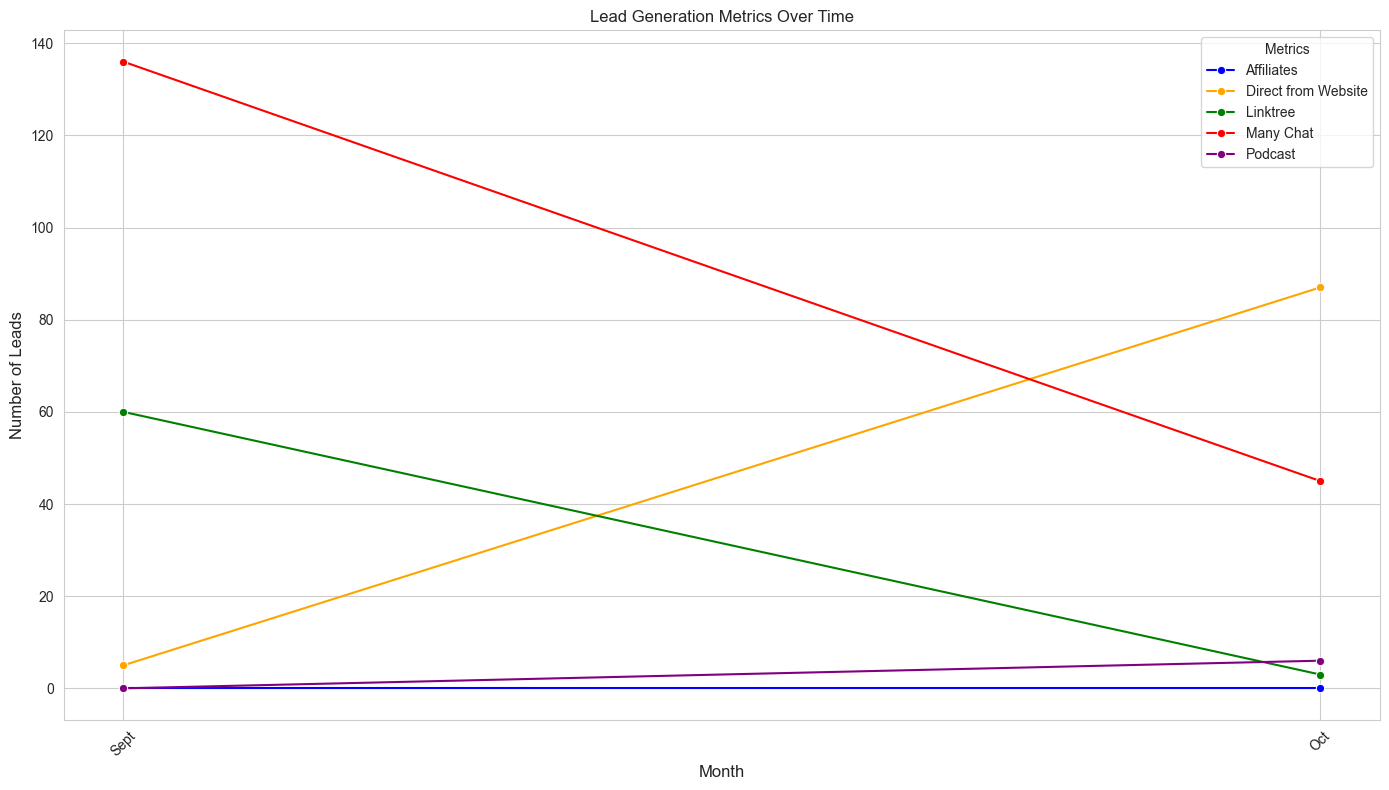

In [95]:
 #Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the style of seaborn
sns.set_style("whitegrid")

# Define the metrics to plot
metrics = ['Affiliates', 'Direct from Website', 'Linktree', 'Many Chat', 'Podcast']

color_palette = {
    'Affiliates': 'blue',
    'Direct from Website': 'orange',
    'Linktree': 'green',
    'Many Chat': 'red',
    'Podcast': 'purple',
    'Social ads': 'pink'
}

# Create a figure and axis
plt.figure(figsize=(14, 8))

# Plot each metric
for metric in metrics:
    sns.lineplot(data=df, x='Month', y=metric, marker='o', label=metric, color=color_palette[metric])

# Add titles and labels
plt.title('Lead Generation Metrics Over Time')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('lead_gen_metrics_without_social_ads.png')
plt.show()

### Lead Generation Channel Analysis
- **Observation**:
    - **Performance shift**: the most striking change was the decline of social ads channel, from 3497 leads in September to a mere 48 leads in October. `Many Chat` and `Linktree` both experienced a decline in leads.

    - **Emerging channels**: The `Website` channel saw a significant increase becoming the highest chanel by October. `Podcast` saw a slight increase.
- **Insight**:
    - **Social ads**: The dramatic fall in social ads raises critical questions about the sustainability of previous marketing strategies.
    - **Website**: The rise in website leads is a positive sign. Leverage this trend by focusing on website-based lead generation strategies.
    - **Podcast**: While the podcast channel saw a slight increase, it remains relatively low compared to other channels. Consider expanding podcast marketing efforts to boost lead generation.


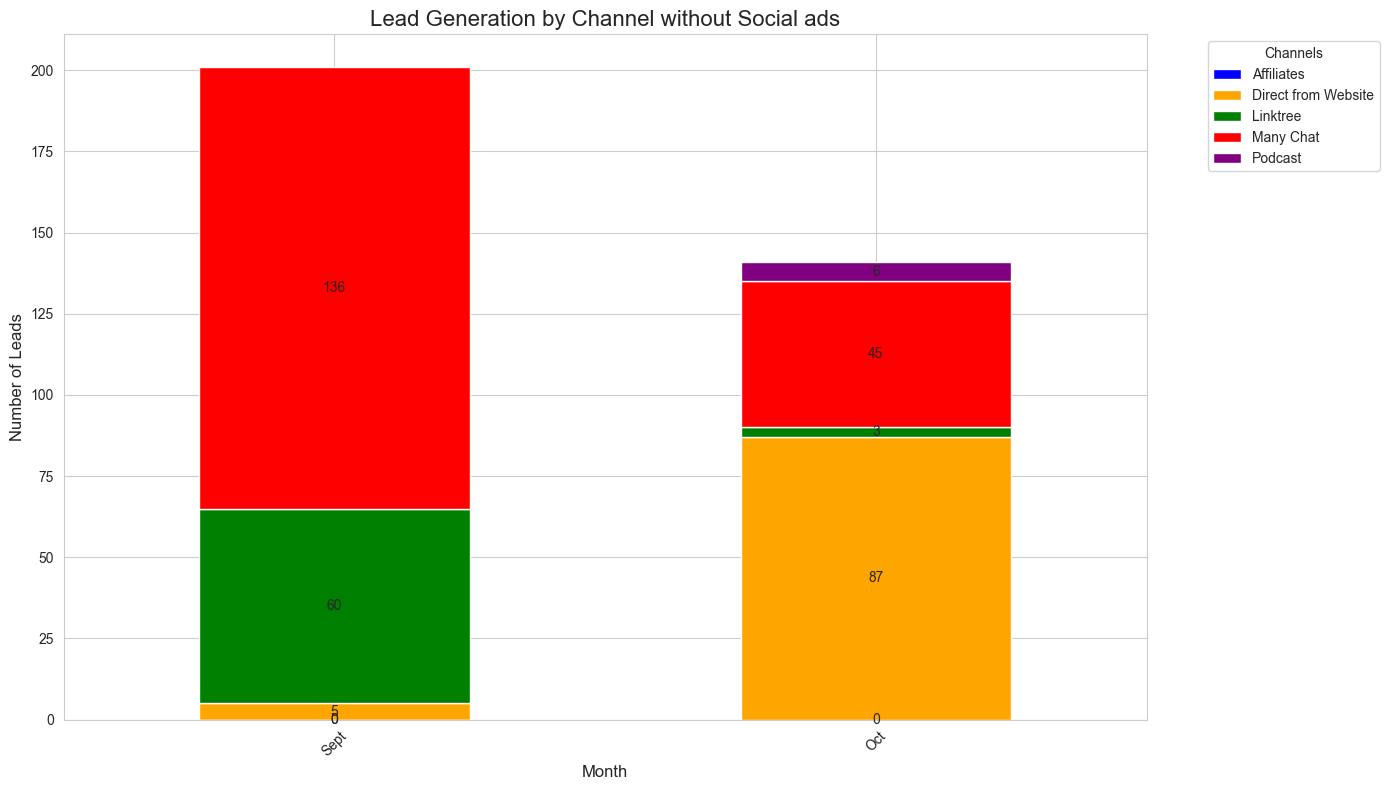

In [96]:
metrics = ['Affiliates', 'Direct from Website', 'Linktree', 'Many Chat', 'Podcast']


# Define a color palette for each channel
color_palette = {
    'Affiliates': 'blue',
    'Direct from Website': 'orange',
    'Linktree': 'green',
    'Many Chat': 'red',
    'Podcast': 'purple',
    'Social ads': 'pink'
}

# Create a stacked bar chart
plt.figure(figsize=(14, 8))

# Prepare data for stacked bar chart
channel_data = df[metrics]

# Plot stacked bar chart
ax = channel_data.plot(kind='bar', stacked=True, color=[color_palette[col] for col in metrics], ax=plt.gca())

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Set titles and labels
plt.title('Lead Generation by Channel without Social ads', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.xticks(ticks=range(len(df['Month'])), labels=df['Month'], rotation=45)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('lead_gen_metrics_without_social_ads_bar.png')
plt.show()

### Data Limitations:
**Observation**: The analysis is based on a limited dataset of two months, which restricts the ability to identify long-term trends or seasonal patterns.

**Insight**: Collecting more data over an extended period will provide a clearer picture of trends and allow for more robust analysis. Consider implementing regular data collection and analysis to track progress and adjust strategies accordingly.


## Summary

This comprehensive analysis of lead generation, Kajabi metrics, and social media engagement has provided valuable insights into the performance and trends across various channels and platforms. Here are the key takeaways:

1. Lead Generation Analysis:
Direct from Website: This channel demonstrated significant growth, becoming a major contributor to lead generation. The success of this channel suggests effective optimization strategies that could be applied to other areas.
Many Chat and Linktree: Both channels experienced declines, indicating a need for strategic reassessment to understand and address the underlying causes.
Emerging Opportunities: The slight increase in Podcast leads suggests potential for growth with targeted efforts.
2. Kajabi Metrics:
Subscriber Trends: September saw a high influx of new subscribers, while October showed improved retention with a dramatic drop in unsubscribes This indicates successful retention strategies and a stable subscriber base.
Strategic Focus: Emphasizing retention and engagement strategies will be crucial to sustaining growth and maximizing subscriber value.
3. Social Media Engagement:
Follower and Video View Growth: While the number of followers and video views increased, total engagement declined, highlighting the need for content that not only attracts but also engages the audience.
Impression Impact: The high impressions in September may have been due to a one-time event, affecting engagement metrics. Understanding these dynamics can help in planning future campaigns.

**Strategic Recommendations**
- Content and Engagement: Develop engaging content strategies to convert new followers into active participants and maintain high engagement levels.
- Channel Optimization: Leverage successful strategies from high-performing channels like the website to enhance other areas.
- Retention and Growth: Focus on retention strategies to maintain a stable subscriber base while exploring new opportunities for growth.

By implementing these recommendations, we can enhance performance across all channels, ensuring sustained growth and engagement. This analysis serves as a foundation for strategic planning and decision-making to drive future success.

![Automation](automation.png)